# Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import Data

In [2]:
# String for Main Project Folder
path = r'C:\Users\ifari\12-2022 Instacart Basket Analysis'

In [3]:
# String to import Data Folder containing orders_products_all.pkl
df_all = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_all.pkl'))

In [4]:
# Dropping "_merge" column
df_all = df_all.drop(columns = ['_merge'])

In [5]:
# First 5 rows of the dataframe
df_all.head()

,order_id,user_id,order_number,orders_day_of_week,time_of_order,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,new_customer,first_name,last_name,gender,state,age,date_joined,num_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,True,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,False,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,False,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,False,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,False,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


#### 1. Create a Histogram of the 'time_of_order'

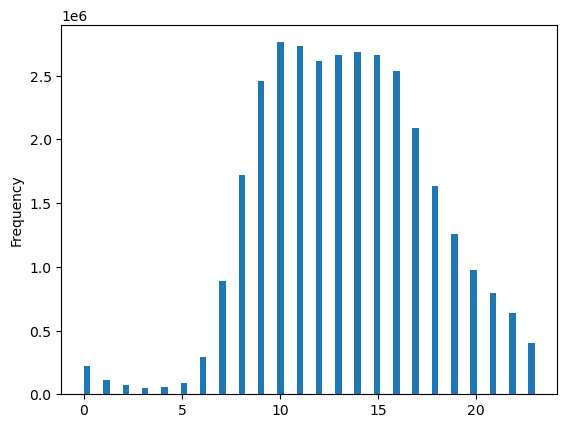

In [19]:
# Create a histogram
hist = df_all['time_of_order'].plot.hist(bins = 70)

> After 6 am, orders increase with the highest peak between 10 to 15 o'clock which is 10am to 3pm. Afterwards, orders begin to decline but only slightly. Not many orders are placed between 0 to 6 o'clock. The histogram appears to unimodal and skewed to the right.

In [8]:
# Export the histogram
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_order_hour_of_day.png'))

#### 2. Create a Bar Chart of the 'loyalty_flag'

<AxesSubplot:>

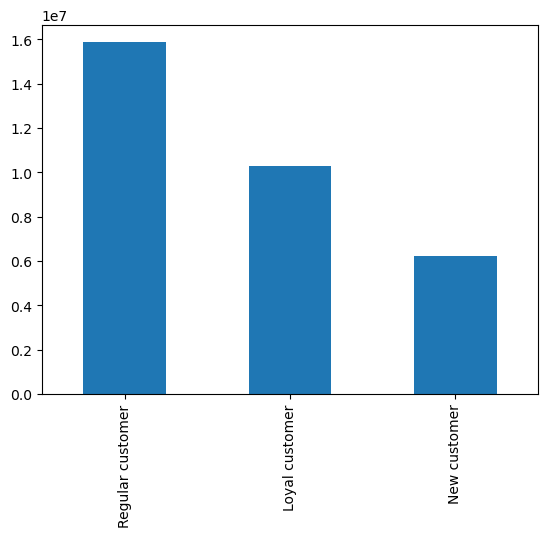

In [9]:
# Create a bar chart
df_all['loyalty_flag'].value_counts().plot.bar()

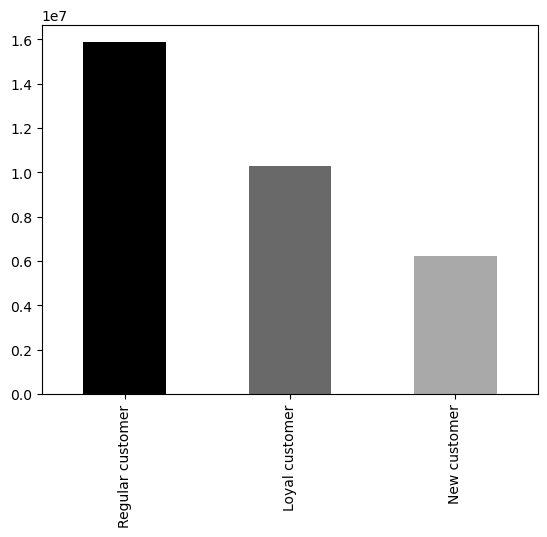

In [10]:
# Create a bar chart with color
bar = df_all['loyalty_flag'].value_counts().plot.bar(color = ['black', 'dimgrey', 'darkgrey'])

> Most customers are regular customers than loyal customers.

In [11]:
# Export the bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))

#### 3. Create a Line Chart of 'price' by 'time_of_order'

In [25]:
# Create a list holding True/False values to the test np.random.rant() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(df_all)) <= 0.7

In [26]:
# Store 70% of the sample in the dataframe big
big = df_all[dev]

In [27]:
# Store 30% of the sample in the dataframe small
small = df_all[~dev]

In [28]:
# Number of rows in the dataframe
len(df_all)

32404859

In [29]:
# Check the number of rows in the dataframe
len(big) + len(small)

32404859

In [30]:
# Create a dataframe to contains only the 'prices' and 'time_of_order' columns from the small subset
df = small[['prices','time_of_order']]

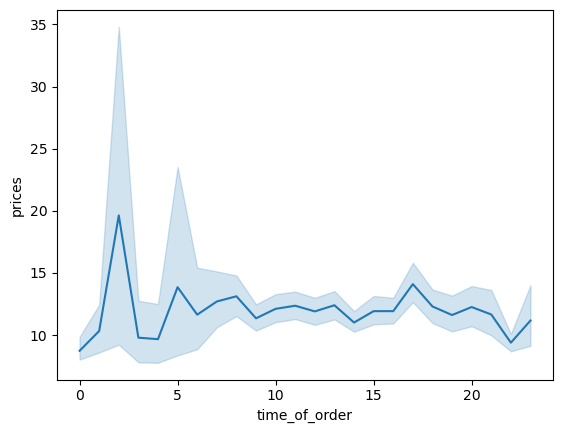

In [31]:
# Create a line chart of the small subset
line = sns.lineplot(data = df, x = 'time_of_order', y = 'prices')

> Customers seem to place the higest orders early in the morning between 2 to 3 am while the lowest price orders tend to be around 5am. After, 5 am the prices start to increase and remain stable between 10 to 18 o'clock.

In [32]:
# Export the line chart
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_time_of_order_vs_prices.png'))

#### 4. Create a Line Chart of 'age' by 'num_dependants'

In [33]:
# Create a dataframe to contains only the 'age' and 'num_dependants' columns from the small subset
df_2 = small[['age','num_dependants']]

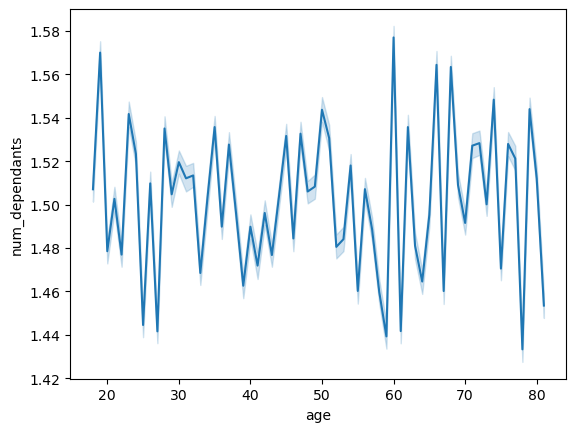

In [34]:
# Create a line chart of the small subset
line_2 = sns.lineplot(data = df_2, x = 'age', y = 'num_dependants')

> There is no clear correlation between the age and number of dependants of the customers.

In [35]:
# Export the line chart
line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_vs_num_dependants.png'))

#### 5. Create a Scatterplot of 'age' by 'income'

<AxesSubplot:xlabel='age', ylabel='income'>

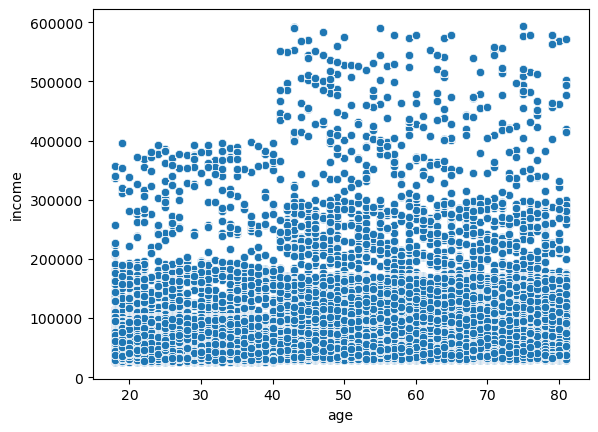

In [36]:
# Create a scatterplot only the 'age' and 'income' columns from the dataframe
sns.scatterplot(x = 'age', y = 'income', data = df_all)

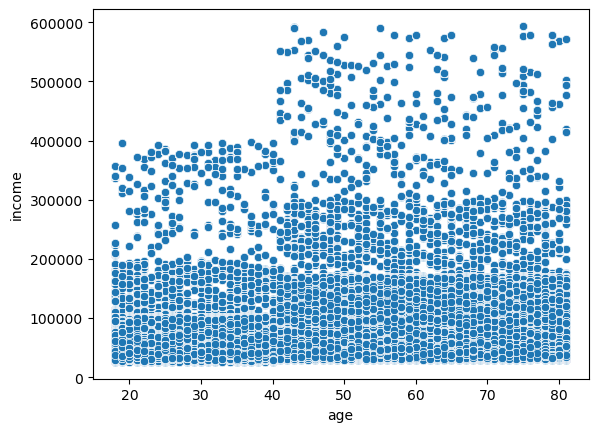

In [37]:
# Create a scatterplot only the 'age' and 'income' columns from the small subset
scatter = sns.scatterplot(x = 'age', y = 'income', data = small)

> There seems to be a positive relationship between age and income where most customers are at or below an income of $200000.

In [38]:
# Export the scatterplot
scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_age_vs_income.png'))